In [1]:
import pandas as pd
import numpy as np

data            = pd.read_csv("./preproc/may_jump_encoded_bike.csv", header = None).to_numpy()
indep_test_data = pd.read_csv("./preproc/june_jump_encoded_bike.csv", header = None).to_numpy()

read = 5

#assert pred > 0

X = np.concatenate([data[:,11-read:11], data[:,-1-read:-1]], axis = 1)#data[:,:-1]
Y = data[:,-1:]

X_it = np.concatenate([indep_test_data[:,11-read:11], indep_test_data[:,-1-read:-1]], axis = 1)
Y_it = indep_test_data[:,-1:]

In [2]:
X.shape, X_it.shape


((512882, 10), (382732, 10))

In [17]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

seed_value = 1789

np.random.seed(seed_value)
tf.random.set_seed(seed_value)
tf.keras.utils.set_random_seed(seed_value)

model = keras.Sequential()
model.add(layers.Dense(32, kernel_initializer = "glorot_normal", input_shape=(2*read,),activation='relu'))
model.add(layers.Dense(16, kernel_initializer = "glorot_normal", activation='relu'))
model.add(layers.Dense(8, kernel_initializer = "glorot_normal", activation='relu'))
model.add(layers.Softmax())



loss_function = 'SparseCategoricalCrossentropy'
adam = tf.keras.optimizers.Adam(learning_rate=0.00003)
model.compile(loss=loss_function, optimizer=adam,metrics=['SparseCategoricalCrossentropy', 'SparseCategoricalAccuracy'])

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                352       
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 8)                 136       
                                                                 
 softmax_1 (Softmax)         (None, 8)                 0         
                                                                 
Total params: 1,016
Trainable params: 1,016
Non-trainable params: 0
_________________________________________________________________


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.70)

In [20]:
history = model.fit(X, Y, epochs= 15,batch_size=100, validation_data=(X_it, Y_it))

Epoch 1/15
5129/5129 [==============================] - 7s 1ms/step - loss: 1.7856 - sparse_categorical_crossentropy: 1.7856 - sparse_categorical_accuracy: 0.4075 - val_loss: 1.4428 - val_sparse_categorical_crossentropy: 1.4428 - val_sparse_categorical_accuracy: 0.5401
Epoch 2/15
5129/5129 [==============================] - 7s 1ms/step - loss: 1.2594 - sparse_categorical_crossentropy: 1.2594 - sparse_categorical_accuracy: 0.5995 - val_loss: 1.0994 - val_sparse_categorical_crossentropy: 1.0994 - val_sparse_categorical_accuracy: 0.6514
Epoch 3/15
5129/5129 [==============================] - 7s 1ms/step - loss: 0.9958 - sparse_categorical_crossentropy: 0.9958 - sparse_categorical_accuracy: 0.6851 - val_loss: 0.9164 - val_sparse_categorical_crossentropy: 0.9164 - val_sparse_categorical_accuracy: 0.7174
Epoch 4/15
5129/5129 [==============================] - 7s 1ms/step - loss: 0.8520 - sparse_categorical_crossentropy: 0.8520 - sparse_categorical_accuracy: 0.7442 - val_loss: 0.7923 - val_sp

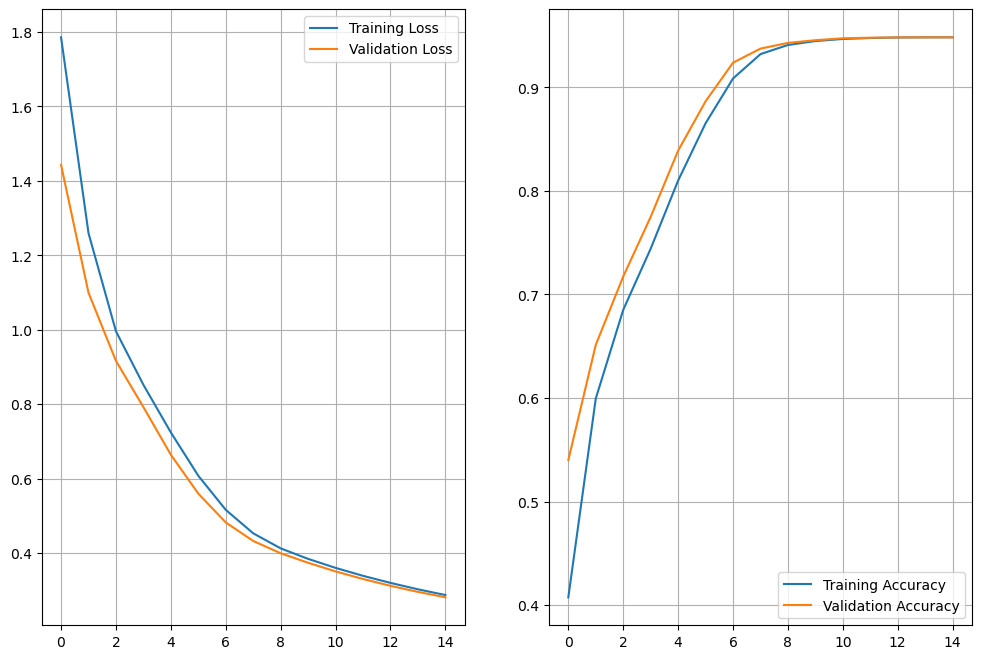

In [21]:
import matplotlib.pyplot as plt

f, a = plt.subplots(ncols = 2, figsize=(12,8))

a[0].plot(history.history['loss'], label = "Training Loss")
a[0].plot(history.history['val_loss'], label = "Validation Loss")

a[0].legend()
#a[0].set_ylim(bottom = 0)
a[0].grid(True)

a[1].plot(history.history['sparse_categorical_accuracy'], label = "Training Accuracy")
a[1].plot(history.history['val_sparse_categorical_accuracy'], label = "Validation Accuracy")

a[1].legend()
#a[1].set_ylim(bottom = 0, top = 1)
a[1].grid(True)

In [22]:
p_vectors = model.predict(X_test)
p_idx     = np.array([np.argmax(v) for v in p_vectors])
p_idx.shape

4809/4809 [==============================] - 3s 552us/step


(153865,)

In [23]:
t = Y_test.flatten()
t.shape

(153865,)

In [24]:
np.sum(t == p_idx) / p_idx.size

0.9482988333929093

In [25]:
it_p_vectors = model.predict(X_it)
it_p_idx     = np.array([np.argmax(v) for v in it_p_vectors])
it_p_idx.shape

11961/11961 [==============================] - 6s 531us/step


(382732,)

In [26]:
it_t = Y_it.flatten()
np.sum(it_t == it_p_idx) / it_p_idx.size

0.9483163153329223

3827


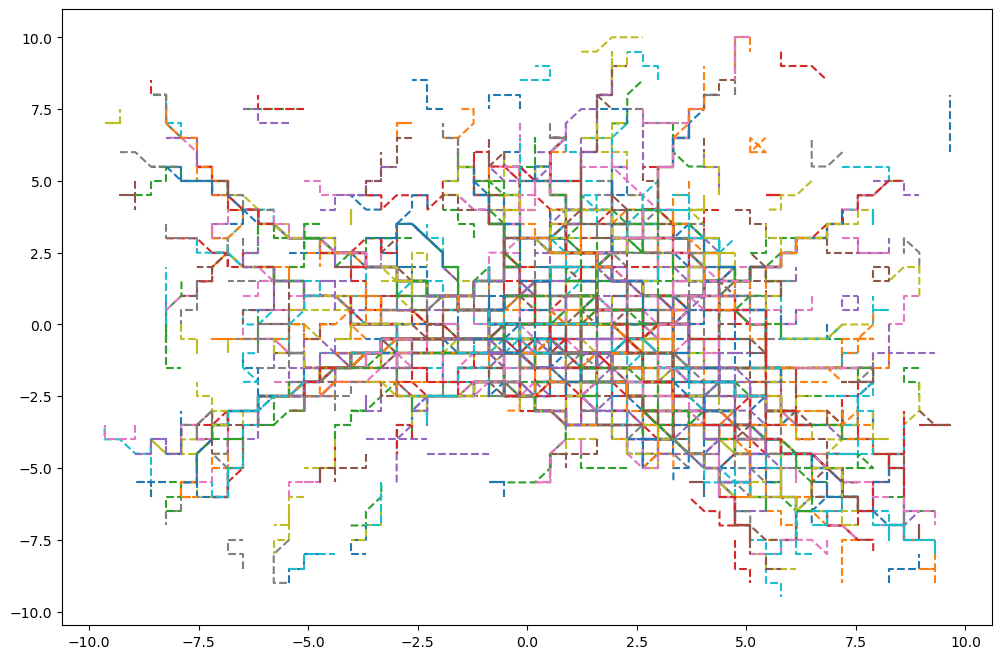

In [27]:
f_tracks, a_tracks = plt.subplots(figsize=(12,8))

#for n, it in enumerate(X[::100,:]):
#    a_tracks.plot(it.reshape(2, -1)[0], it.reshape(2, -1)[1])
#print(n)

for n, it in enumerate(X_it[::100,:]):
    a_tracks.plot(it.reshape(2, -1)[0], it.reshape(2, -1)[1], linestyle = '--')
print(n)

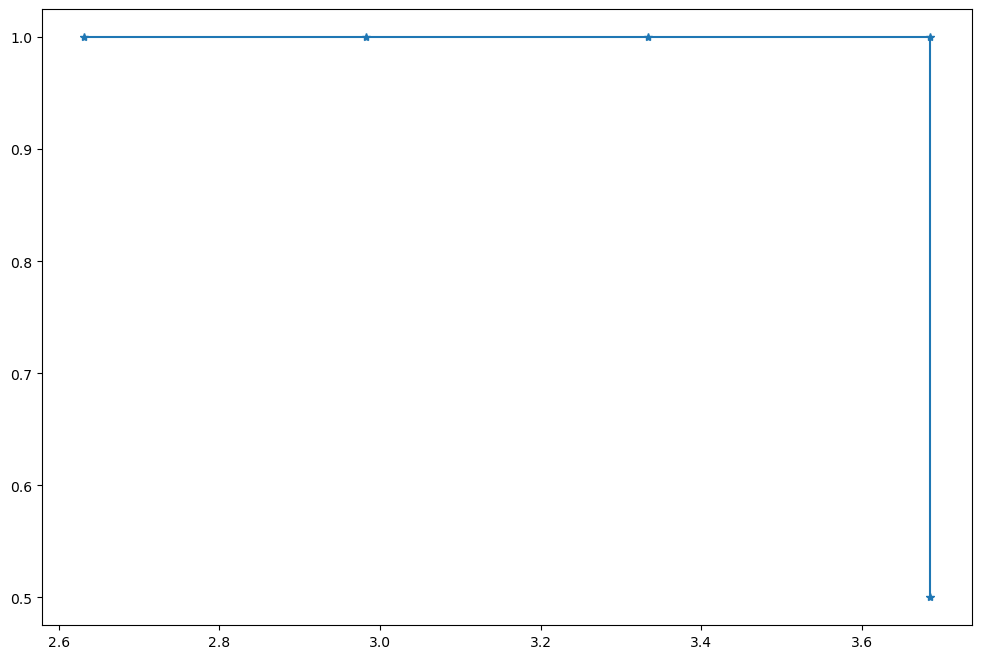

In [28]:
f_tracks, a_tracks = plt.subplots(figsize=(12,8))
a_tracks.plot(X_it[0,:].reshape(2, -1)[0], X_it[0,:].reshape(2, -1)[1], marker = '*')


In [29]:
null_model = np.random.randint(0, 8, size = it_p_idx.shape[0])


In [30]:
np.sum(null_model == it_p_idx) / it_p_idx.size

0.12554476761807218